In [1]:
# Matplotlib Inline Charts
%matplotlib inline

In [2]:
# Import Dependencies
from citipy import citipy
from datetime import datetime
import gmaps
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
from scipy.stats import linregress
import time

# Import the API keys.
from config import weather_api_key
from config2 import g_key


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
len(coordinates)

1500

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | verkhovazhye
Processing Record 4 of Set 1 | richards bay
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | berlevag
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | hede
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | coolum beach
Proces

Processing Record 38 of Set 4 | bathsheba
Processing Record 39 of Set 4 | khani
Processing Record 40 of Set 4 | ixtapa
Processing Record 41 of Set 4 | dekar
Processing Record 42 of Set 4 | mogadishu
Processing Record 43 of Set 4 | morgan city
Processing Record 44 of Set 4 | ercis
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | ponta do sol
Processing Record 47 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 48 of Set 4 | tairua
Processing Record 49 of Set 4 | saint-denis
Processing Record 50 of Set 4 | barrhead
Processing Record 1 of Set 5 | abu dhabi
Processing Record 2 of Set 5 | high level
Processing Record 3 of Set 5 | airai
Processing Record 4 of Set 5 | olafsvik
Processing Record 5 of Set 5 | baraganul
Processing Record 6 of Set 5 | raipur
Processing Record 7 of Set 5 | behbahan
Processing Record 8 of Set 5 | phonhong
Processing Record 9 of Set 5 | kidal
Processing Record 10 of Set 5 | ilulissat
Processing Record 11 of Set 5 | alta flo

City not found. Skipping...
Processing Record 28 of Set 8 | parana
Processing Record 29 of Set 8 | leningradskiy
Processing Record 30 of Set 8 | thunder bay
Processing Record 31 of Set 8 | zatoka
Processing Record 32 of Set 8 | viedma
Processing Record 33 of Set 8 | anadyr
Processing Record 34 of Set 8 | kismayo
Processing Record 35 of Set 8 | ypsonas
Processing Record 36 of Set 8 | kibala
Processing Record 37 of Set 8 | saint-jerome
Processing Record 38 of Set 8 | lekoni
Processing Record 39 of Set 8 | tsumeb
Processing Record 40 of Set 8 | sioux lookout
Processing Record 41 of Set 8 | paternion
Processing Record 42 of Set 8 | port hardy
Processing Record 43 of Set 8 | jojoima
Processing Record 44 of Set 8 | constitucion
Processing Record 45 of Set 8 | sanduleni
Processing Record 46 of Set 8 | karakulino
Processing Record 47 of Set 8 | jinchang
Processing Record 48 of Set 8 | cap malheureux
Processing Record 49 of Set 8 | sinnamary
Processing Record 50 of Set 8 | yelan
Processing Reco

Processing Record 16 of Set 12 | ust-koksa
Processing Record 17 of Set 12 | bashtanka
Processing Record 18 of Set 12 | kinkala
Processing Record 19 of Set 12 | praia
Processing Record 20 of Set 12 | broken hill
Processing Record 21 of Set 12 | viet tri
Processing Record 22 of Set 12 | altay
Processing Record 23 of Set 12 | muros
Processing Record 24 of Set 12 | road town
Processing Record 25 of Set 12 | kuche
City not found. Skipping...
Processing Record 26 of Set 12 | wakkanai
Processing Record 27 of Set 12 | idenao
Processing Record 28 of Set 12 | mocorito
Processing Record 29 of Set 12 | ayios matthaios
City not found. Skipping...
Processing Record 30 of Set 12 | bayir
Processing Record 31 of Set 12 | hualmay
Processing Record 32 of Set 12 | gazanjyk
Processing Record 33 of Set 12 | ringebu
Processing Record 34 of Set 12 | tuatapere
Processing Record 35 of Set 12 | tumut
Processing Record 36 of Set 12 | novo aripuana
Processing Record 37 of Set 12 | alvdal
Processing Record 38 of Se

In [9]:
# Check Results
len(city_data)

542

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kruisfontein,-34.0033,24.7314,47.03,55,0,2.59,ZA,2021-07-12 01:45:50
1,Verkhovazhye,60.7472,42.0465,65.08,75,38,4.97,RU,2021-07-12 01:45:50
2,Richards Bay,-28.7830,32.0377,63.19,76,0,13.78,ZA,2021-07-12 01:45:51
3,Port Alfred,-33.5906,26.8910,65.16,28,0,7.07,ZA,2021-07-12 01:45:51
4,Jamestown,42.0970,-79.2353,69.30,97,90,1.01,US,2021-07-12 01:43:22
5,Tasiilaq,65.6145,-37.6368,48.36,99,100,8.55,GL,2021-07-12 01:45:52
6,Berlevag,70.8578,29.0864,50.61,72,8,12.12,NO,2021-07-12 01:45:52
7,Punta Arenas,-53.1500,-70.9167,33.91,93,75,19.57,CL,2021-07-12 01:45:52
8,Carnarvon,-24.8667,113.6333,69.87,92,75,20.71,AU,2021-07-12 01:45:53
9,Chokurdakh,70.6333,147.9167,46.74,57,100,13.00,RU,2021-07-12 01:45:53


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kruisfontein,ZA,2021-07-12 01:45:50,-34.0033,24.7314,47.03,55,0,2.59
1,Verkhovazhye,RU,2021-07-12 01:45:50,60.7472,42.0465,65.08,75,38,4.97
2,Richards Bay,ZA,2021-07-12 01:45:51,-28.7830,32.0377,63.19,76,0,13.78
3,Port Alfred,ZA,2021-07-12 01:45:51,-33.5906,26.8910,65.16,28,0,7.07
4,Jamestown,US,2021-07-12 01:43:22,42.0970,-79.2353,69.30,97,90,1.01
5,Tasiilaq,GL,2021-07-12 01:45:52,65.6145,-37.6368,48.36,99,100,8.55
6,Berlevag,NO,2021-07-12 01:45:52,70.8578,29.0864,50.61,72,8,12.12
7,Punta Arenas,CL,2021-07-12 01:45:52,-53.1500,-70.9167,33.91,93,75,19.57
8,Carnarvon,AU,2021-07-12 01:45:53,-24.8667,113.6333,69.87,92,75,20.71
9,Chokurdakh,RU,2021-07-12 01:45:53,70.6333,147.9167,46.74,57,100,13.00


In [31]:
# Create the output file (CSV).
output_data_file = os.path.join("weather_data", "cities.csv")

# Export the City_Data into a CSV.
#city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/11/21'

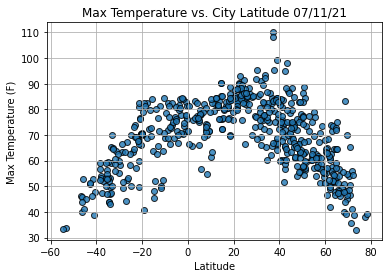

In [32]:
# Build the scatter plot for max temperature vs. latitude.
plt.scatter(lats,
            max_temps,
            edgecolor="black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Max Temperature vs. City Latitude "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

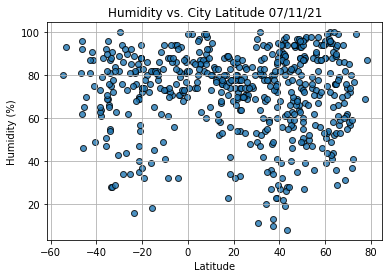

In [33]:
# Build the scatter plot for humidity vs. latitude.
plt.scatter(lats,
            humidity,
            edgecolor="black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Humidity vs. City Latitude "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

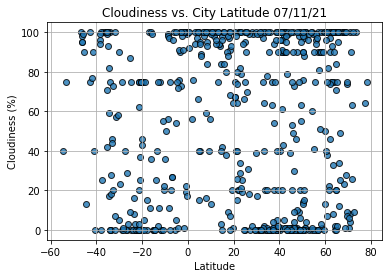

In [34]:
# Build the scatter plot for cloudiness vs. latitude.
plt.scatter(lats,
            cloudiness,
            edgecolor="black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Cloudiness vs. City Latitude "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

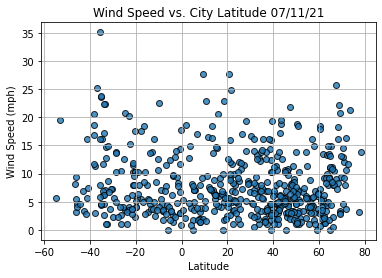

In [35]:
# Build the scatter plot for wind speed vs. latitude.
plt.scatter(lats,
            wind_speed,
            edgecolor="black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Wind Speed vs. City Latitude "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression_v2(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2)) + ". R: " + str(round(r_value, 2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2021-07-12 01:45:54
Lat                        -33.65
Lng                      115.3333
Max Temp                    59.04
Humidity                       75
Cloudiness                     28
Wind Speed                  22.35
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Verkhovazhye,RU,2021-07-12 01:45:50,60.7472,42.0465,65.08,75,38,4.97
4,Jamestown,US,2021-07-12 01:43:22,42.0970,-79.2353,69.30,97,90,1.01
5,Tasiilaq,GL,2021-07-12 01:45:52,65.6145,-37.6368,48.36,99,100,8.55
6,Berlevag,NO,2021-07-12 01:45:52,70.8578,29.0864,50.61,72,8,12.12
9,Chokurdakh,RU,2021-07-12 01:45:53,70.6333,147.9167,46.74,57,100,13.00


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

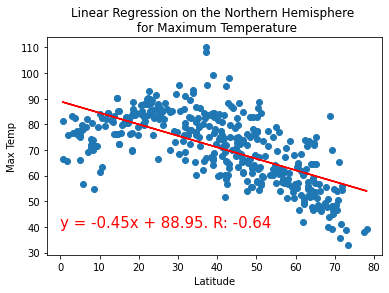

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression_v2(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(0, 40))

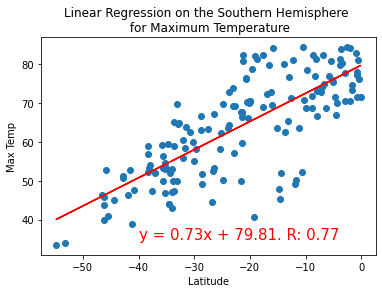

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression_v2(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 'Max Temp',(-40, 35))

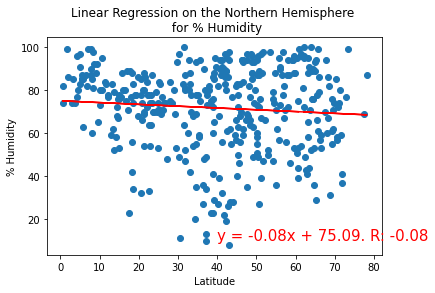

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression_v2(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

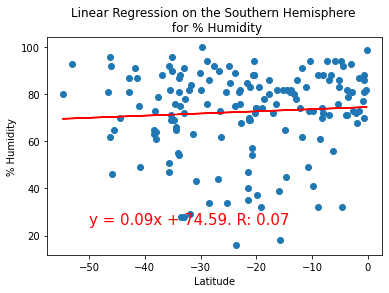

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression_v2(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,25))

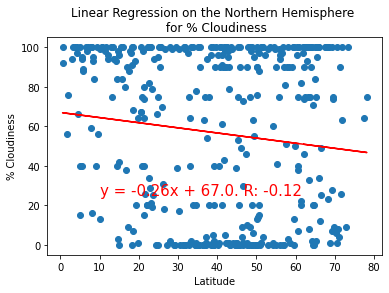

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression_v2(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,25))

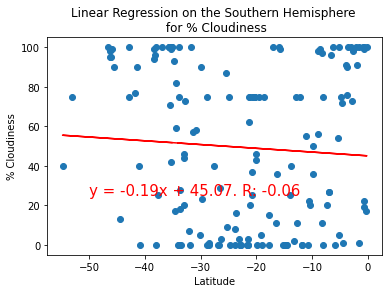

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression_v2(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,25))

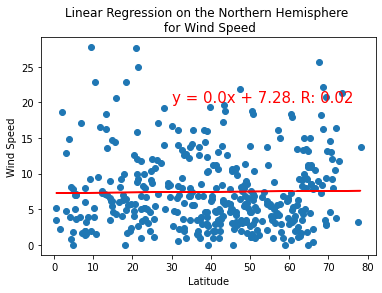

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression_v2(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(30,20))

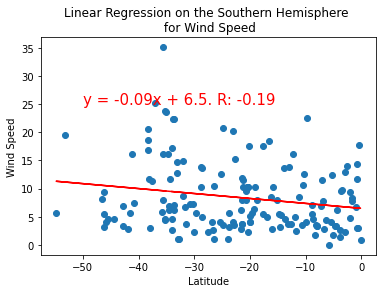

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression_v2(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))

In [3]:
# Heatmaps Creation Section

# Load the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv(os.path.join("weather_data", "cities.csv"))
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Kruisfontein,ZA,2021-07-12 01:45:50,-34.0033,24.7314,47.03,55,0,2.59
1,1,Verkhovazhye,RU,2021-07-12 01:45:50,60.7472,42.0465,65.08,75,38,4.97
2,2,Richards Bay,ZA,2021-07-12 01:45:51,-28.7830,32.0377,63.19,76,0,13.78
3,3,Port Alfred,ZA,2021-07-12 01:45:51,-33.5906,26.8910,65.16,28,0,7.07
4,4,Jamestown,US,2021-07-12 01:43:22,42.0970,-79.2353,69.30,97,90,1.01


In [4]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [5]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [8]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [12]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False,
                                max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [14]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
# Heatmap of wind speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [17]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [23]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
11,11,Butaritari,KI,2021-07-12 01:45:54,3.0707,172.7902,83.21,74,94,12.86
18,18,Hilo,US,2021-07-12 01:41:54,19.7297,-155.0900,78.80,68,1,5.75
19,19,Vaini,TO,2021-07-12 01:45:56,-21.2000,-175.2000,80.76,83,20,10.36
27,27,Meulaboh,ID,2021-07-12 01:45:59,4.1363,96.1285,77.45,77,97,3.89
29,29,Namatanai,PG,2021-07-12 01:45:59,-3.6667,152.4333,84.06,71,90,9.66
32,32,Westport,US,2021-07-12 01:46:00,41.1415,-73.3579,75.76,91,61,1.99
33,33,Tautira,PF,2021-07-12 01:46:01,-17.7333,-149.1500,82.42,80,15,17.63
42,42,Virginia Beach,US,2021-07-12 01:46:03,36.8529,-75.9780,82.47,80,75,6.91
43,43,Nakhon Phanom,TH,2021-07-12 01:46:04,17.3333,104.4167,80.40,71,9,4.00
47,47,Cabo San Lucas,MX,2021-07-12 01:46:05,22.8909,-109.9124,89.82,54,29,10.00


In [24]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
11,Butaritari,KI,83.21,3.0707,172.7902,
18,Hilo,US,78.80,19.7297,-155.0900,
19,Vaini,TO,80.76,-21.2000,-175.2000,
27,Meulaboh,ID,77.45,4.1363,96.1285,
29,Namatanai,PG,84.06,-3.6667,152.4333,
32,Westport,US,75.76,41.1415,-73.3579,
33,Tautira,PF,82.42,-17.7333,-149.1500,
42,Virginia Beach,US,82.47,36.8529,-75.9780,
43,Nakhon Phanom,TH,80.40,17.3333,104.4167,
47,Cabo San Lucas,MX,89.82,22.8909,-109.9124,


In [25]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}